In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
%matplotlib inline
import matplotlib
import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams['figure.figsize']=(12,6)  #to increase the visualization size

In [3]:
df = pd.read_csv('zomato.csv',encoding='latin-1')

In [6]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [7]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [9]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


#### Find the missing values

#### Missing values using missingno library

<AxesSubplot:>

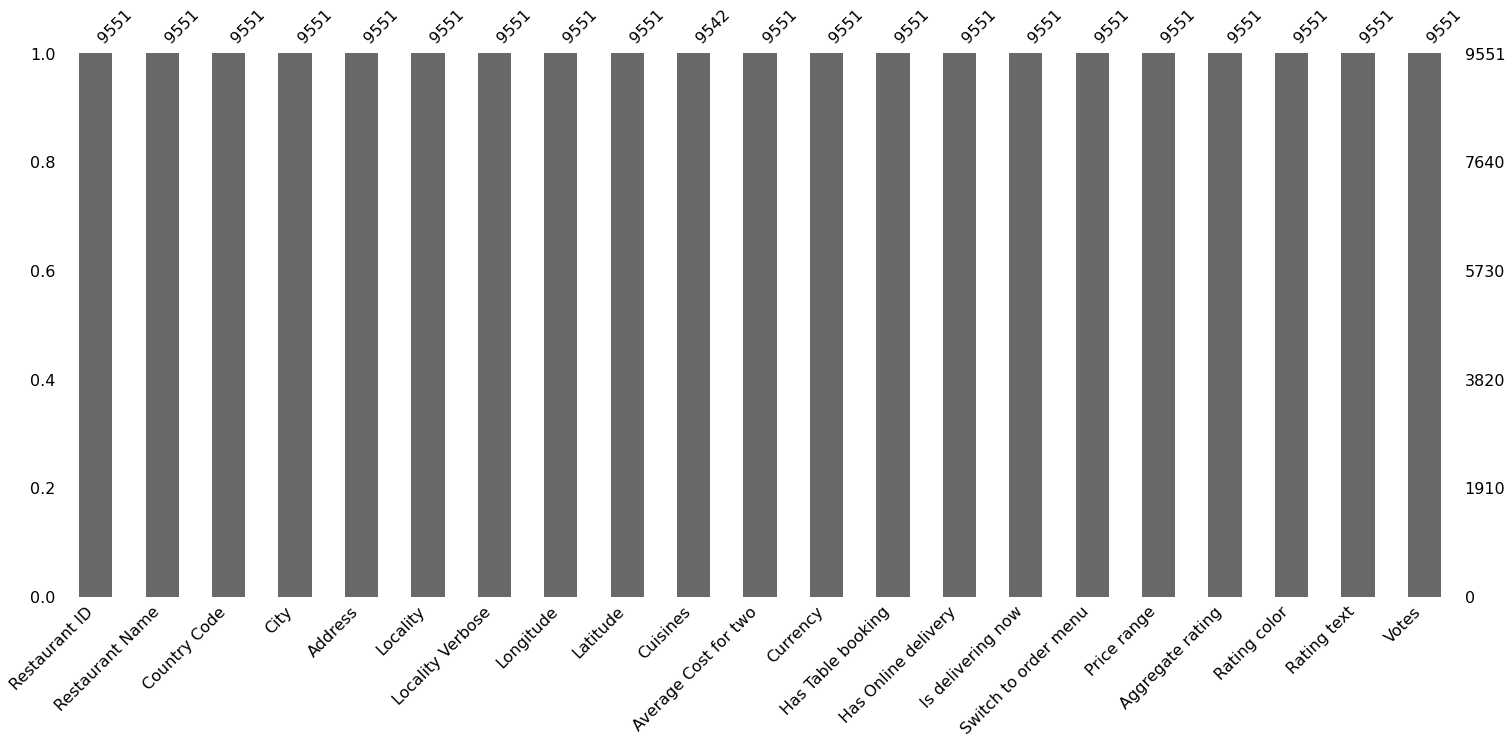

In [11]:
msno.bar(df)

Only 9 values are missing in 'cuisines' column

#### Finding columns which have missing values

In [27]:
[col for col in df.columns if df[col].isnull().sum()>0]

['Cuisines']

Only 'Cuisines' have missing values

#### Missing values using heatmap

<AxesSubplot:>

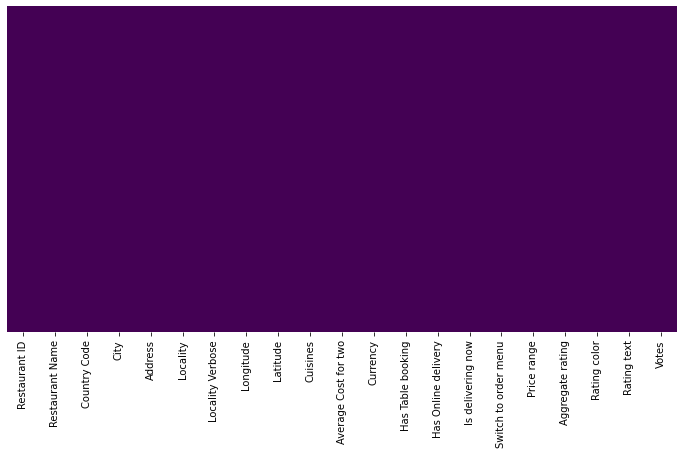

In [83]:
sb.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [37]:
df_country = pd.read_excel('Country-Code.xlsx')

In [38]:
df_country.head(2)

,Country Code,Country
0,1,India
1,14,Australia


#### combining zomato and country code data

In [40]:
final_df = pd.merge(left=df,right=df_country,how='left',on='Country Code')

In [41]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [42]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [43]:
final_df['Country'].value_counts()

India             8652
United States      434
United Kingdom      80
UAE                 60
South Africa        60
Brazil              60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Sri Lanka           20
Singapore           20
Canada               4
Name: Country, dtype: int64

#### to get all the country names only from above result

In [45]:
country_names = final_df['Country'].value_counts().index

#### to get the counts of above result

In [48]:
country_count = final_df['Country'].value_counts().values

### Top 3 countries using pie chart

#### Lets create a pie chart

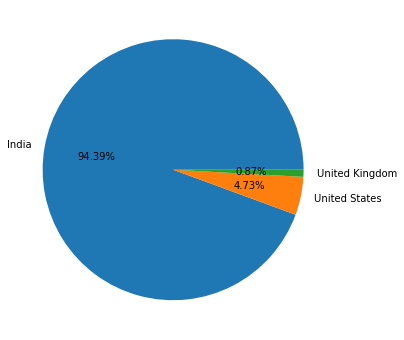

In [82]:
plt.pie(country_count[0:3],labels=country_names[0:3],autopct='%.2f%%')
plt.show()

Out of all transactions 94% are from India followed by USA and UK

In [60]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [66]:
ratings = final_df[['Aggregate rating','Rating color','Rating text']].groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename({0:'count'},axis=1)

In [67]:
ratings

,Aggregate rating,Rating color,Rating text,count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


1. when rating is between 4.5 to 4.9 --> Excellent
2. when rating is between 4 to 4.4 --> very good
3. when rating is between 3.5 to 3.9 --> Good
4. when rating is between 2.5 to 3.4 --> Average
5. when rating is between 1.8 to 2.4 --> Poor
6. when rating is 0 --> Not rated

<AxesSubplot:xlabel='Aggregate rating', ylabel='count'>

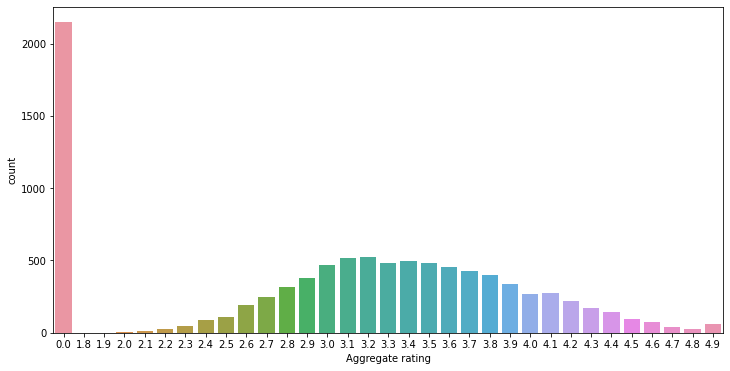

In [91]:
sb.barplot(ratings['Aggregate rating'],ratings['count'])

<AxesSubplot:xlabel='Aggregate rating', ylabel='count'>

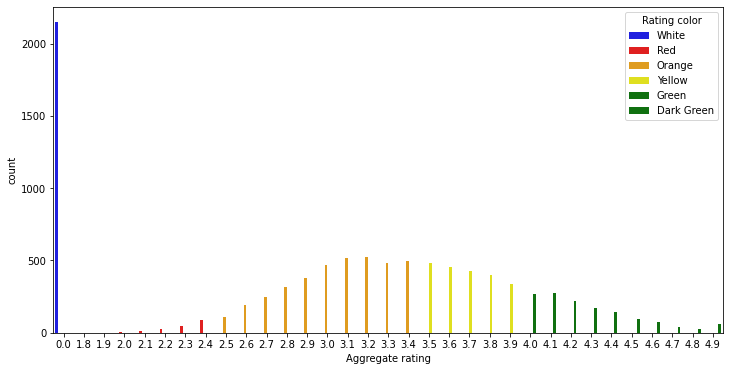

In [96]:
sb.barplot(ratings['Aggregate rating'],ratings['count'],hue=ratings['Rating color'],palette=['blue','red','orange','yellow','green','green'])

1. Not Rated transactions are very high.
2. Maximum number are ratings are between 2.5-4.5

#### Find the countries that have given 0 ratings.

In [107]:
final_df[final_df['Aggregate rating']==0].groupby('Country').size().reset_index().rename({0:'Count'},axis=1)

,Country,Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


Maximum number of 0 ratings are from INDIA

#### Find out which currency is used by which country

In [113]:
final_df.groupby('Country')['Currency'].unique().reset_index()

,Country,Currency
0,Australia,[Dollar($)]
1,Brazil,[Brazilian Real(R$)]
2,Canada,[Dollar($)]
3,India,[Indian Rupees(Rs.)]
4,Indonesia,[Indonesian Rupiah(IDR)]
5,New Zealand,[NewZealand($)]
6,Phillipines,[Botswana Pula(P)]
7,Qatar,[Qatari Rial(QR)]
8,Singapore,[Dollar($)]
9,South Africa,[Rand(R)]


#### Which country do have online deliveries option

In [114]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [119]:
final_df[final_df['Has Online delivery']=='Yes']['Country'].unique()

array(['UAE', 'India'], dtype=object)

only INDIA and UAE provide online delivery options

#### Country who have and also dont have online delivery options

In [123]:
final_df[['Country','Has Online delivery']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


#### Create a pie chart for cities distribution

In [124]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [133]:
city_names = final_df['City'].value_counts().index

In [135]:
city_count = final_df['City'].value_counts().values

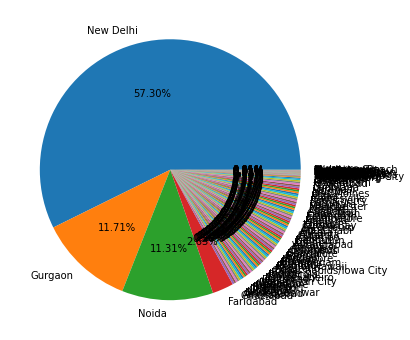

In [136]:
plt.pie(city_count,labels=city_names,autopct='%.2f%%')
plt.show()

#### Top 5 cities

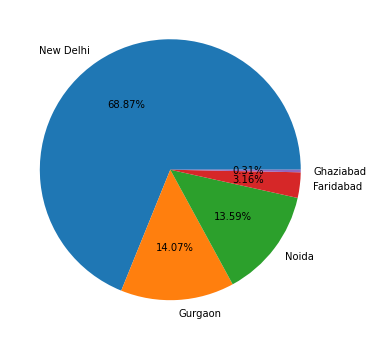

In [137]:
plt.pie(city_count[0:5],labels=city_names[0:5],autopct='%.2f%%')
plt.show()